<a href="https://colab.research.google.com/github/YakupTopaloglu/Morphological-Process/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import (erosion, dilation, opening, closing,
                                white_tophat, black_tophat, skeletonize,
                                thin, square, rectangle, diamond, disk, star,
                                octagon, ellipse)
from skimage import data
from skimage.filters import threshold_otsu
from skimage import io
from skimage import color

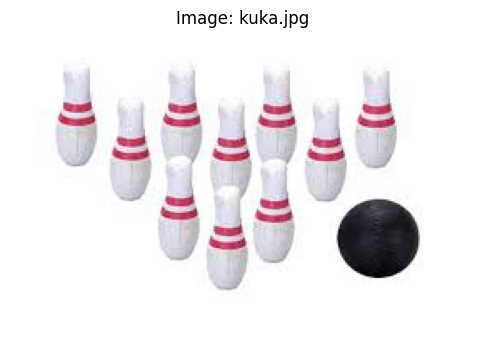

In [10]:
# Load the images

image_kuka = io.imread('/content/drive/MyDrive/Goruntu_Isleme_Proje/kuka.jpg')



plt.figure(figsize=(6, 6))
plt.imshow(image_kuka)
plt.title('Image: kuka.jpg')
plt.axis('off')
plt.show()

In [11]:
# Define the structuring elements
structuring_elements = {
    "Square (5x5)": square(5),
    "Rectangle (3x5)": rectangle(3, 5),
    "Diamond (3)": diamond(3),
    "Disk (5)": disk(5),
    "Star (5)": star(5),
    "Octagon (3, 2)": octagon(3, 2),
    "Ellipse (5, 3)": ellipse(5, 3)
}

# Print the structuring elements as text
for name, se in structuring_elements.items():
    print(f"{name}:\n{se}\n")

Square (5x5):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Rectangle (3x5):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Diamond (3):
[[0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]]

Disk (5):
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]

Star (5):
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 

<ipython-input-11-d9edc883b29f>:3: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Square (5x5)": square(5),
<ipython-input-11-d9edc883b29f>:4: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Rectangle (3x5)": rectangle(3, 5),


In [16]:
# Convert image to grayscale
gray_image = color.rgb2gray(image_kuka)

# Convert grayscale image to binary
thresh = 0.9  # Manually set threshold for demonstration
binary_image = gray_image > thresh

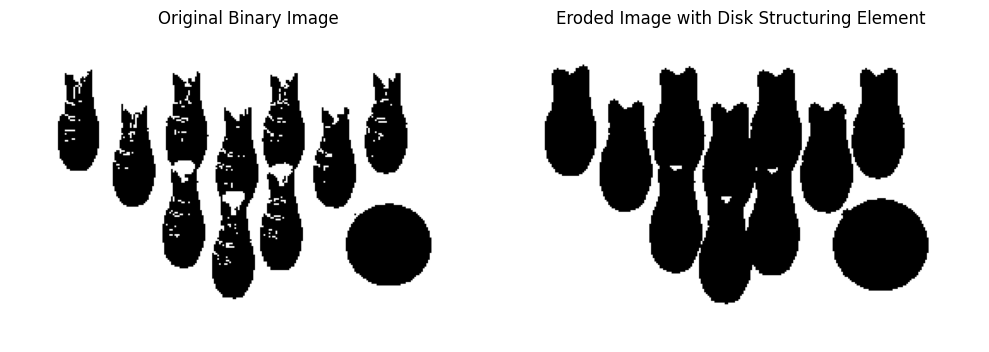

In [17]:
# Define a disk-shaped 7x7 structuring element
selem = disk(3)

# Apply erosion
eroded_image = erosion(binary_image, selem)

# Display the original and eroded images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

ax[1].imshow(eroded_image, cmap='gray')
ax[1].set_title('Eroded Image with Disk Structuring Element')
ax[1].axis('off')

plt.tight_layout()
plt.show()


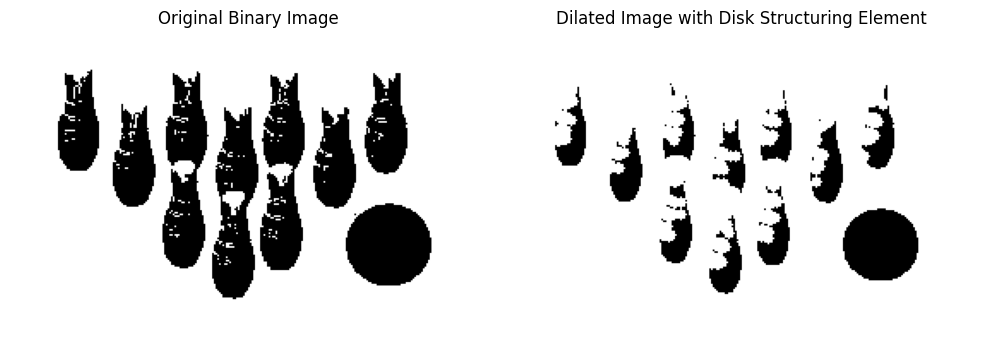

In [18]:
# Define a disk-shaped 7x7 structuring element
selem = disk(3)

# Apply dilation
dilated_image = dilation(binary_image, selem)

# Display the original and dilated images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

ax[1].imshow(dilated_image, cmap='gray')
ax[1].set_title('Dilated Image with Disk Structuring Element')
ax[1].axis('off')

plt.tight_layout()
plt.show()

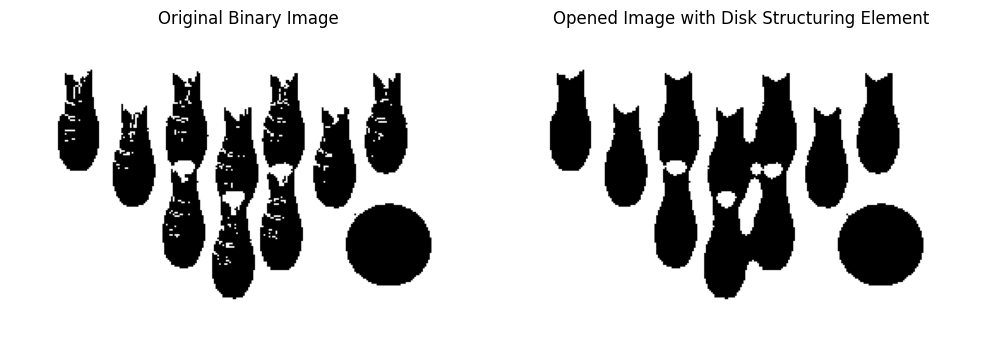

In [19]:

# Define a disk-shaped structuring element
selem = disk(3)

# Display the original and opened images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

# Apply opening (erosion followed by dilation)
opened_image = opening(binary_image, selem)

ax[1].imshow(opened_image, cmap='gray')
ax[1].set_title('Opened Image with Disk Structuring Element')
ax[1].axis('off')

plt.tight_layout()
plt.show()

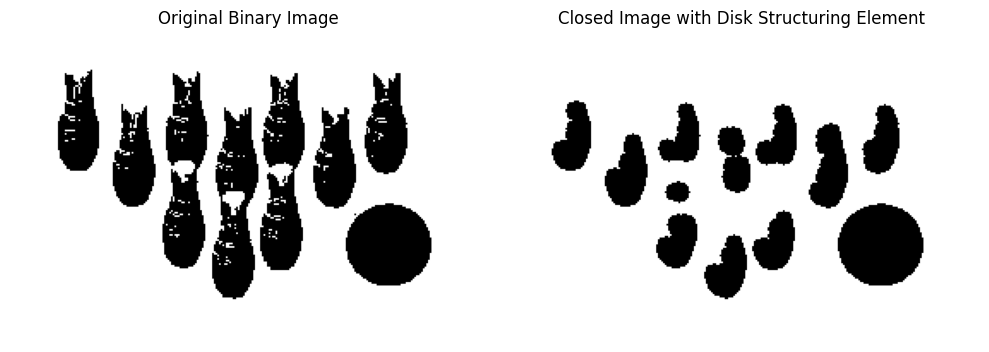

In [20]:

# Define a disk-shaped structuring element
selem = disk(5)

# Apply closing (dilation followed by erosion)
closed_image = closing(binary_image, selem)

# Display the original and closed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

ax[1].imshow(closed_image, cmap='gray')
ax[1].set_title('Closed Image with Disk Structuring Element')
ax[1].axis('off')

plt.tight_layout()
plt.show()


